# Table of Contents

## 01. Importing Libraries and Data

## 02. Data Cleaning
### - Missing Values
### - Duplicates

## 03. Data Prep for Regression Analysis

## 04. Regression Analysis

## 05. Extracting Dataframe

------

# 01. Importing Libraries and Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# ensuringe that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path= r'C:\Users\princess\Downloads\12-23 Gun Violence Analysis'

In [4]:
#importing cleaned dataset 

gv_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '6.3_gun_violence_cleaned.csv'))

-------

# 02. Data Cleaning

In [5]:
gv_df.head()

,Unnamed: 0,Incident ID,Date,Year,Month,Weekday,State,City or County,Address,Number Killed,...,Location Description,Notes,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count
0,0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,...,NaN,Julian Sims under investigation: Four Shot and...,0,0,5,4,3,1,4,1
1,1,460726,2013-01-01,2013,1,1,California,Hawthorne,13500 block of Cerise Avenue,1,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0,0,4,1,1,0,4,1
2,2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1776 East 28th Street,1,...,Cotton Club,NaN,0,0,5,5,5,0,3,2
3,3,478925,2013-01-05,2013,1,5,Colorado,Aurora,16000 block of East Ithaca Place,4,...,NaN,NaN,0,0,4,4,3,1,3,1
4,4,478959,2013-01-07,2013,1,0,North Carolina,Greensboro,307 Mourning Dove Terrace,2,...,NaN,Two firearms recovered. (Attempted) murder sui...,0,1,3,4,2,2,3,1


In [6]:
gv_df = gv_df.drop(columns=['Unnamed: 0'])

In [7]:
gv_df.head()

,Incident ID,Date,Year,Month,Weekday,State,City or County,Address,Number Killed,Number Injured,...,Location Description,Notes,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count
0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,...,NaN,Julian Sims under investigation: Four Shot and...,0,0,5,4,3,1,4,1
1,460726,2013-01-01,2013,1,1,California,Hawthorne,13500 block of Cerise Avenue,1,3,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0,0,4,1,1,0,4,1
2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1776 East 28th Street,1,3,...,Cotton Club,NaN,0,0,5,5,5,0,3,2
3,478925,2013-01-05,2013,1,5,Colorado,Aurora,16000 block of East Ithaca Place,4,0,...,NaN,NaN,0,0,4,4,3,1,3,1
4,478959,2013-01-07,2013,1,0,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,...,NaN,Two firearms recovered. (Attempted) murder sui...,0,1,3,4,2,2,3,1


In [8]:
gv_df.columns

Index(['Incident ID', 'Date', 'Year', 'Month', 'Weekday', 'State',
       'City or County', 'Address', 'Number Killed', 'Number Injured',
       'Number of Guns Involved', 'Incident Characteristics',
       'Congressional District', 'Latitude', 'Longitude', 'Location Combined',
       'Location Description', 'Notes', 'Child Participants 0-11',
       'Teen Participants 12-17', 'Adult Participants 18+',
       'Total Participants', 'Male Participants', 'Female Participants',
       'Victim Count', 'Suspect Count'],
      dtype='object')

### Missing Values

In [9]:
# Check for missing values

missing_values_count= gv_df.isnull().sum()
missing_values_count

Incident ID                      0
Date                             0
Year                             0
Month                            0
Weekday                          0
State                            0
City or County                   0
Address                      16497
Number Killed                    0
Number Injured                   0
Number of Guns Involved      99451
Incident Characteristics       326
Congressional District       11944
Latitude                      7923
Longitude                     7923
Location Combined                0
Location Description        197588
Notes                        81017
Child Participants 0-11          0
Teen Participants 12-17          0
Adult Participants 18+           0
Total Participants               0
Male Participants                0
Female Participants              0
Victim Count                     0
Suspect Count                    0
dtype: int64

In [10]:
# how many total missing values do we have?
total_cells = np.product(gv_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing) #not as much as i thought, 6% is relatively low

6.782670010055199


In [14]:
# will drop address column as it is not needed for the nature of the analysis
gv_df = gv_df.drop(columns=['Address'])

In [15]:
gv_df.columns 

Index(['Incident ID', 'Date', 'Year', 'Month', 'Weekday', 'State',
       'City or County', 'Number Killed', 'Number Injured',
       'Number of Guns Involved', 'Incident Characteristics',
       'Congressional District', 'Latitude', 'Longitude', 'Location Combined',
       'Location Description', 'Notes', 'Child Participants 0-11',
       'Teen Participants 12-17', 'Adult Participants 18+',
       'Total Participants', 'Male Participants', 'Female Participants',
       'Victim Count', 'Suspect Count'],
      dtype='object')

### Duplicates

In [16]:
dups = gv_df.duplicated()

In [17]:
dups.shape # No dups

(239677,)

# 03. Data Prep for Regression Analysis

My hypothesis is : "Does the frequency of gun violence differ across different locations?"

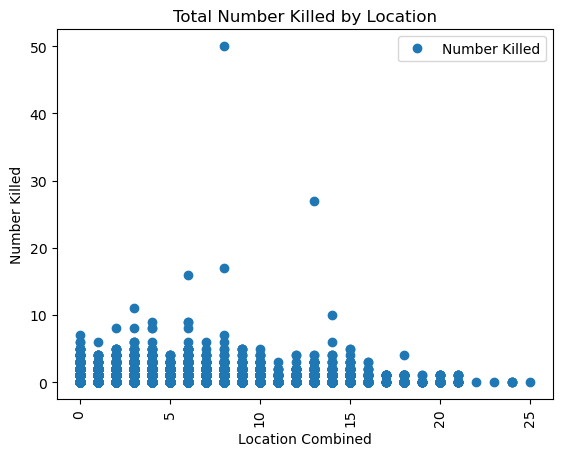

In [60]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

gv_df.plot(x = 'Location Combined', y='Number Killed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Number Killed by Location')
plt.xticks(rotation=90)
plt.xlabel('Location Combined')  
plt.ylabel('Number Killed')  
plt.show()

In [61]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = gv_df['Location Combined'].values.reshape(-1,1)
y = gv_df['Number Killed'].values.reshape(-1,1)

In [62]:
X

array([[0],
       [1],
       [0],
       ...,
       [4],
       [6],
       [0]], dtype=int64)

In [64]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]], dtype=int64)

In [65]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04. Regression Analysis

In [66]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [67]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

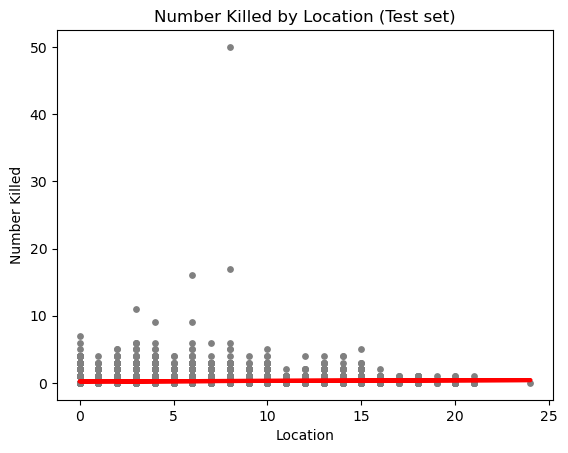

In [70]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number Killed by Location (Test set)')
plot_test.xlabel('Location')
plot_test.ylabel('Number Killed')
plot_test.show()

In [71]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [72]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00837819]]
Mean squared error:  0.3026690219839893
R2 score:  0.0031325817524606725


In [73]:
y_predicted

array([[0.27925932],
       [0.27088113],
       [0.24574656],
       ...,
       [0.22061198],
       [0.24574656],
       [0.23736836]])

In [74]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.279259
1,4,0.270881
2,0,0.245747
3,0,0.270881
4,0,0.262503
5,0,0.254125
6,0,0.237368
7,1,0.270881
8,0,0.220612
9,0,0.228990


In [75]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [76]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [77]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00837819]]
Mean squared error:  0.25799914802659263
R2 score:  0.0031056943968765793


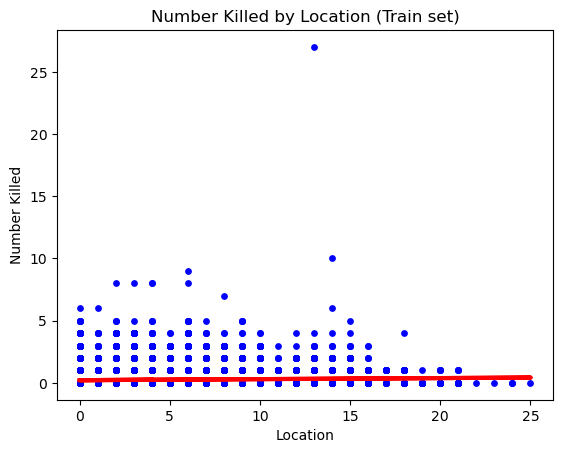

In [78]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number Killed by Location (Train set)')
plot_test.xlabel('Location')
plot_test.ylabel('Number Killed')
plot_test.show()

The models show that location and the number of people killed does not have an overly strong relationship in regards to numerical values. The number of people killed varies for states, as seen in the last exercise, but no strong relationship for number killed and the numerical coordinates of location. 

# 05. Extracting Dataframe

In [79]:
# exporting df to csv
gv_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data','6.4_gun_violence_cleaned.csv'))